# Point in Polygon
## Damien Allison, Drew Mattson, Caleb Andreano

### Computational Problem:
Given a series of two-dimensional points whose composition creates a simple polygon, determine if a distinct point is within the polygon.

### Decision Rule:
<Placeholder: A one-paragraph description of a "decision rule" that can be applied to solve the problem.>
<Placeholder: Provide at least two examples illustrating how the rule is applied>

### Pseudocode:
<Placeholder: High-level pseudocode for an algorithm that uses your rule to solve the computational problem for all inputs>

### Justification:
<Placeholder: A 1-3 paragraph justification of why your algorithm is correct.>

In [22]:
def plot(poly, point):
    x, y = point
    fig, ax = plt.subplots()
    ax.set_xlim(min(poly, key=lambda p: p[0])[0] - 1, max(poly, key=lambda p: p[0])[0] + 1)
    ax.set_ylim(min(poly, key=lambda p: p[1])[1] - 1, max(poly, key=lambda p: p[1])[1] + 1)
    ax.add_patch(Polygon(poly, closed=True, fill=False, color='g', linewidth=2))
    plt.plot(x, y, 'ro', label=f'{x}, {y}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Polygon with point ({x}, {y})')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
import math


# The intersection function returns the point of intersection between the
# line that is made from p1 and p0 and the horizontal line y.
def intersection(p1, p0, y):
    return math.nan \
        if p1[1] - p0[1] == 0 \
        else -(y * (p1[0] - p0[0]) - p0[1] * (p1[0] - p0[0]) - p0[0] * (p1[1] - p0[1])) / (p1[1] - p0[1])

# The in_bounds function returns true if the x value of the intersection is
# within the min and max bounds.
def in_bounds(min_x, intersect_x, max_x):
    return not math.isnan(intersect_x) and min_x <= intersect_x <= max_x


# The inside function determines if a point is inside a polygon made of other points.
def in_polygon(points, target):
    count = 1 if points[0][1] == target[1] else 0
    max_x = points[0][0]
    # Finds the bounds that the intersections must be made in.
    for p in points:
        max_x = p[0] if max_x < p[0] else max_x
        count = count + 1 if p[1] == target[1] else count
    # min_x is the x value of the target point.

    # A point is within the polygon if the number of intersections
    # within the bounds is an odd number. This is accomplished by a
    # series of function calls.

    # The filter function will remove all points that do not have
    # intersections within the bounds. The filter function also returns
    # an iterator which must be converted into a list before the remaining
    # elements can be counted. If the length is odd, then return true.
    count += len(list(filter(
        # This lambda function is used by the filter to iterate through all
        # lines created by the points within the points list and to check if
        # the intersection with the horizontal line y is within bounds.
        # If it is, the point is kept within the array.
        lambda i: in_bounds(
            target[0],
            intersection(points[i], points[(i + 1) % len(points)], target[1]),
            max_x),
        range(len(points))
    )))

    return count % 2 == 1

### Asymptotic Analysis of the worst-case run-time of your algorithm
<Placeholder: Asymptotic Analysis of the worst-case run-time of your algorithm>

### Test Cases:
<Placeholder: A table of your test cases. For each describe the input, the answer you would expect to get, and the actual answer>
The input domain can be partitioned in a few ways which can be more easily seen in graph from below:
<img src="./Test Case Analysis.png" width="500">
There are 5 partitions within the input domain. These are: 
 - Green: Above the maximum y value of the polygon
 - Red: Left of the minimum x value of the polygon
 - White: Inside the polygon
 - Blue: Right of the maximum x value of the polygon
 - Purple: Below the minimum y value of the polygon

There are also 8 points on the boundaries of the partitions which also must be tested. These can be seen as the black points in the image above.

All test cases provide the distinct point and are all tested against a square for convenience.
The points that make up the square are: (2, 2), (2, 4), (4,4), (4, 2)

| Title                | Description | Expected Answer | Actual Answer |
|:---------------------|:------------|:----------------|:--------------|
| Above of the Polygon | (3, 5)      | False           |               |
| Left of the Polygon  | (1, 3)      | False           |               |
| In the Polygon       | (3, 3)      | True            |               |
| Right of the Polygon | (5, 3)      | False           |               |
| Below the Polygon    | (3, 1)      | False           |               |
| On top boundary      | B           | False           |               |
| On left boundary     | B           | False           |               |
| On right boundary    | B           | False           |               |
| On bottom boundary   | B           | False           |               |



In [34]:
test_polygon = [(2, 2), (2, 4), (4, 4), (4, 2)]
test_cases = [
    {"Point": (3, 5), "Expected": False},
    {"Point": (1, 3), "Expected": False},
    {"Point": (3, 3), "Expected": True},
    {"Point": (5, 3), "Expected": False},
    {"Point": (3, 1), "Expected": False},
]

for t in test_cases:
    print(t["Point"], "->", "Expected:", t["Expected"], "Actual: ", in_polygon(test_polygon, t["Point"]), sep="\t")

(3, 5)	->	Expected:	False	Actual: 	True
(1, 3)	->	Expected:	False	Actual: 	False
(3, 3)	->	Expected:	True	Actual: 	True
(5, 3)	->	Expected:	False	Actual: 	False
(3, 1)	->	Expected:	False	Actual: 	True


### Benchmarking:
<Placeholder: A table and graph from benchmarking your implementation on problem instances of different sizes

### Theory vs Actuality
<Placeholder: A paragraph comparing your benchmarking results to your theoretical asymptotic run-time.> 
<Placeholder: This should include an explanation of whether your results support your theoretically-derived run-time.>

True


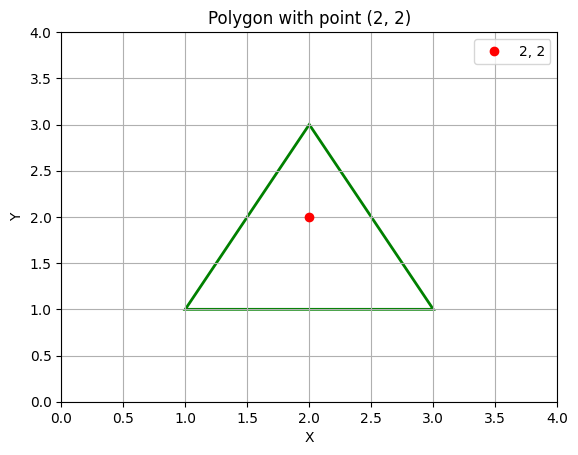

True


In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def point_inside_polygon(x, y, poly):
    # throw out point immediately

    n = len(poly)  # n = number of vertices
    inside = False
    p1x, p1y = poly[0]  # poly is an array of tuples, representing (x, y) points
    for i in range(n + 1):  # number of pairs + (last, first)
        p2x, p2y = poly[i % n]  # p2 will be poly[0] when i = len
        if y > min(p1y, p2y) and y <= max(p1y, p2y):  # if we're in the y bound   
            if x <= max(p1x, p2x):  # if we're between x = 0 and the maximum x bound
                if p1y != p2y:  # otherwise, we have a line with the same height, not going to intersect
                    xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x  # x intercept = this equation
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y


    return inside


polygon = [(1, 1), (2, 3), (3, 1)]
point = (2, 2)
print(point_inside_polygon(point[0], point[1], polygon))  # inside: True
plot(polygon, point)
print(in_polygon(polygon, point))  # inside: True
